# Exploratory Data Analysis - Amazon Reviews Dataset

In [1]:
from dataset_loader import load_dataset_amazon
from tmp import create_tmp
import matplotlib.pyplot as plt

# Reset pyplot
plt.clf()
plt.close('all')
plt.style.use("dark_background")

# Create tmp folder
create_tmp()

# Select Dataset
dataset_file = "test.csv"
#dataset_file = "train.csv"
text_full = True

# Load Dataset
df = load_dataset_amazon(dataset_file, text_full)
print(f"Size of {dataset_file} dataset: {df.size}")

/home/user/Documents/sentimentml/venv/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Recreated directory: /home/user/Documents/sentimentml/tmp
Dataset already downloaded. Reusing cached version at /home/user/Documents/sentimentml/datasets/kritanjalijain/amazon-reviews/versions/2
Size of test.csv dataset: 2000000


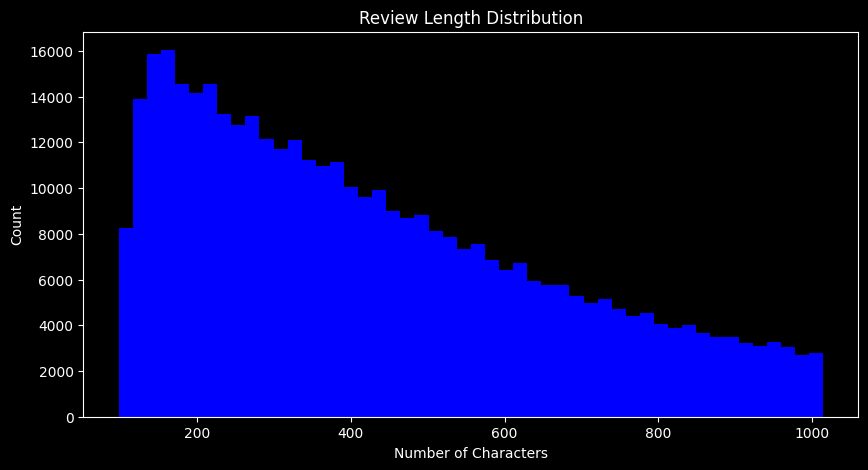

In [2]:
# Plot histogram
plt.figure(figsize=(10,5))
plt.hist(df["length"], bins=50, color="blue")
plt.title("Review Length Distribution")
plt.xlabel("Number of Characters")
plt.ylabel("Count")
plt.show()

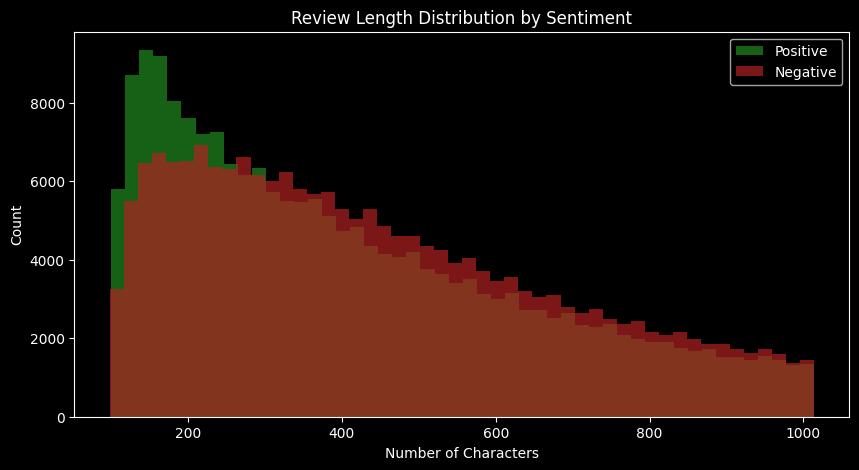

In [12]:
# separate by class
pos = df[df["label"] == 2]["length"]
neg = df[df["label"] == 1]["length"]

# plot
plt.figure(figsize=(10,5))
plt.hist(pos, bins=50, alpha=0.7, color="forestgreen", label="Positive")
plt.hist(neg, bins=50, alpha=0.7, color="firebrick", label="Negative")
plt.xlabel("Number of Characters")
plt.ylabel("Count")
plt.title("Review Length Distribution by Sentiment")
plt.legend()
plt.show()

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/user/Documents/sentimentml/tmp/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


Top 20 Words in Positive Reviews:
[('book', 113157), ('great', 93006), ('one', 74727), ('good', 66705), ('like', 53992), ('read', 45127), ('love', 39685), ('well', 38699), ('best', 35896), ('would', 35761), ('time', 34571), ('get', 32667), ('really', 32650), ('movie', 30766), ('first', 27310), ('album', 25994), ('much', 24971), ('also', 24148), ('story', 22163), ('use', 22151)]

Top 20 Words in Negative Reviews:
[('book', 105715), ('one', 78203), ('like', 60707), ('would', 58074), ('good', 48432), ('get', 44092), ('time', 40407), ('movie', 37008), ('even', 35462), ('read', 33166), ('buy', 32324), ('really', 31535), ('much', 31384), ('product', 31270), ('money', 31226), ('first', 29126), ('work', 27353), ('great', 26812), ('better', 26722), ('bad', 25979)]


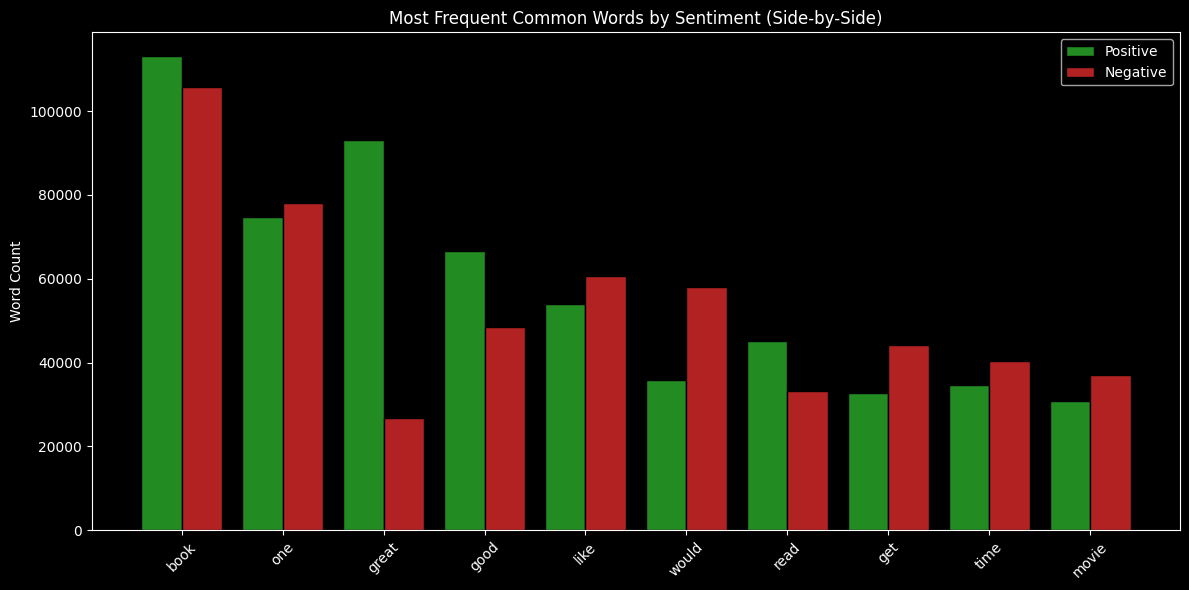

In [4]:
import re
from pathlib import Path
from collections import Counter

import nltk
from nltk.corpus import stopwords
import matplotlib.pyplot as plt


# Keep NLTK data inside the repo instead of the user directory
nltk_data_dir = Path.cwd() / "tmp" / "nltk_data"
nltk_data_dir.mkdir(parents=True, exist_ok=True)
nltk.data.path.insert(0, str(nltk_data_dir))

# Download stopwords if not already present
nltk.download("stopwords", download_dir=str(nltk_data_dir))

# Load English stopwords
stop = set(stopwords.words("english"))


def tokenize(text: str) -> list:
    # Convert to lowercase
    text = text.lower()

    # Remove non-alphabetic characters (numbers, punctuation, symbols)
    text = re.sub(r"[^a-z\s]", " ", text)

    # Split into tokens
    words = text.split()

    # Remove stopwords and very short tokens
    return [w for w in words if w not in stop and len(w) > 2]


# Extract words separately by sentiment class
pos_words = []
neg_words = []

# Accumulate tokens for positive reviews (label = 2)
for text in df[df["label"] == 2]["text_full"]:
    pos_words.extend(tokenize(text))

# Accumulate tokens for negative reviews (label = 1)
for text in df[df["label"] == 1]["text_full"]:
    neg_words.extend(tokenize(text))


# Count word frequencies (top 20 for each class)
top_pos = Counter(pos_words).most_common(20)
top_neg = Counter(neg_words).most_common(20)

print("Top 20 Words in Positive Reviews:")
print(top_pos)

print("\nTop 20 Words in Negative Reviews:")
print(top_neg)


# ---------- Build side-by-side bar chart ----------

# Convert to dicts for easier lookup
pos_dict = dict(top_pos)
neg_dict = dict(top_neg)

# Use only words that appear in both top lists
common_words = list(set(pos_dict.keys()) & set(neg_dict.keys()))

# If there are many common words, keep only the most frequent ones overall (optional)
common_words.sort(key=lambda w: pos_dict[w] + neg_dict[w], reverse=True)
common_words = common_words[:10]  # top 10 common words

pos_counts = [pos_dict[w] for w in common_words]
neg_counts = [neg_dict[w] for w in common_words]

# Create side-by-side bar plot
x = range(len(common_words))

plt.figure(figsize=(12, 6))
plt.bar([i - 0.2 for i in x], pos_counts, width=0.4, label="Positive", edgecolor="black", color="forestgreen")
plt.bar([i + 0.2 for i in x], neg_counts, width=0.4, label="Negative", edgecolor="black", color="firebrick")



plt.xticks(list(x), common_words, rotation=45)
plt.ylabel("Word Count")
plt.title("Most Frequent Common Words by Sentiment (Side-by-Side)")
plt.legend()
plt.tight_layout()
plt.show()
